## Arbitrary Value imputation

It consists of replacing NAN by an arbitrary value
This arbitrary value should not be frequent present

In [1]:
import pandas as pd
df = pd.read_csv("train.csv",usecols=['Age','Fare',"Survived"])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [2]:
def impute_nan(df, variable):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

<AxesSubplot: >

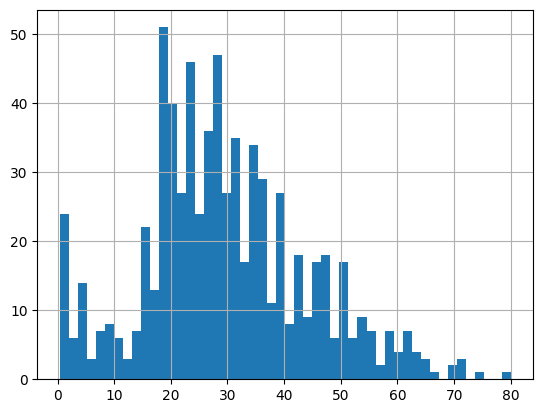

In [3]:
df["Age"].hist(bins=50)

In [4]:
impute_nan(df,"Age")

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Age_hundred'}>],
       [<AxesSubplot: title={'center': 'Age_zero'}>, <AxesSubplot: >]],
      dtype=object)

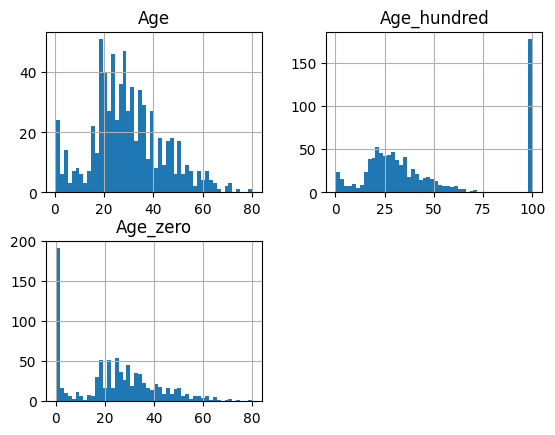

In [5]:
df[["Age","Age_hundred","Age_zero"]].hist(bins=50)

#### Advantages
 1. Easy to implement
 2. Captures the importance of missingness if ther is one
 
#### Disadvantages
 1. Distorts the original distribution of the variable
 2. If missingness is not important, it may mask the predictive power of the original variable by distortion
 3. Hard to decide which value to use


## How to handle categorical missing values?

### Frequent Category Imputation

In [6]:
df=pd.read_csv("train_house.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [7]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [9]:
df.shape

(1460, 4)

#### Compute the frequency with every feature

<AxesSubplot: xlabel='BsmtQual'>

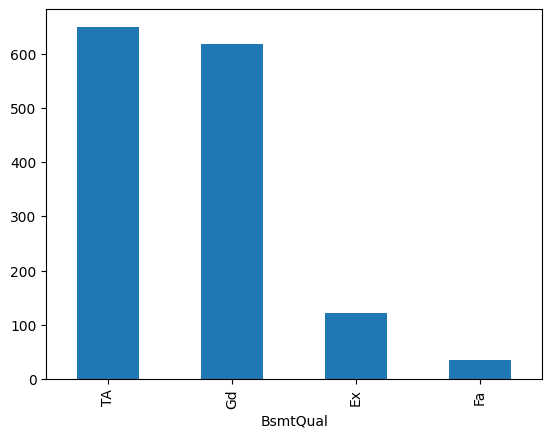

In [14]:
df.groupby(["BsmtQual"])["BsmtQual"].count().sort_values(ascending=False).plot.bar()

<AxesSubplot: >

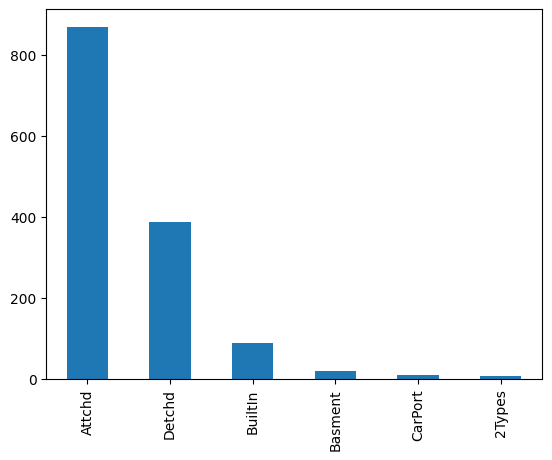

In [17]:
df["GarageType"].value_counts().plot.bar()

<AxesSubplot: >

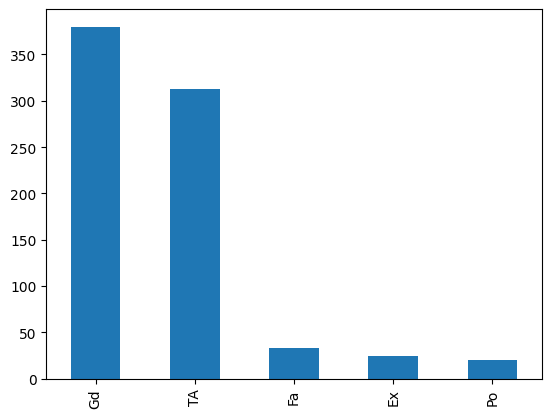

In [18]:
df["FireplaceQu"].value_counts().plot.bar()

In [32]:
df["GarageType"].value_counts().index[0]

'Attchd'

In [33]:
#### Replcaing function
def impute_nan(df, variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace= True)

In [35]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df,feature)

In [36]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd          Gd     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [37]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages
1. Easy to implement
2. Faster way to implement

#### Disadvantages
1. Since we are using the more frequent label, it may use them in an over represented way, if there are many NAN
2. It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [46]:
df = pd.read_csv("train_house.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [47]:
import numpy as np
df['BsmtQual_var'] = np.where(df["BsmtQual"].isnull(),1,0)

In [48]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [50]:
frequent = df["BsmtQual"].mode()[0]

In [51]:
df["BsmtQual_var"].fillna(frequent, inplace =True)

In [52]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [55]:
df['FireplaceQu_var'] = np.where(df["FireplaceQu"].isnull(),1,0)
frequent = df["FireplaceQu"].mode()[0]
df["FireplaceQu_var"].fillna(frequent, inplace =True)

In [56]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_var  FireplaceQu_var
0       Gd         NaN     Attchd     208500             0                1
1       Gd          TA     Attchd     181500             0                0
2       Gd          TA     Attchd     223500             0                0
3       TA          Gd     Detchd     140000             0                0
4       Gd          TA     Attchd     250000             0                0

 #### Suppoese if you have more frequent categories, we just replace NAN with a new category. In short we make the NAN value itself a category

In [57]:
df=pd.read_csv("train_house.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [58]:
def impute_nan(df, variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [59]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df,feature)

In [60]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice BsmtQual_newvar  \
0       Gd         NaN     Attchd     208500              Gd   
1       Gd          TA     Attchd     181500              Gd   
2       Gd          TA     Attchd     223500              Gd   
3       TA          Gd     Detchd     140000              TA   
4       Gd          TA     Attchd     250000              Gd   

  FireplaceQu_newvar GarageType_newvar  
0            Missing            Attchd  
1                 TA            Attchd  
2                 TA            Attchd  
3                 Gd            Detchd  
4                 TA            Attchd

In [62]:
df["BsmtQual_newvar"].value_counts()

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQual_newvar, dtype: int64

In [ ]:
df.drop(["BsmtQual","FireplaceQu","GarageType"],axis=1)

In [66]:
df.head()

SalePrice BsmtQual_newvar FireplaceQu_newvar GarageType_newvar
0     208500              Gd            Missing            Attchd
1     181500              Gd                 TA            Attchd
2     223500              Gd                 TA            Attchd
3     140000              TA                 Gd            Detchd
4     250000              Gd                 TA            Attchd